# Wrangle and Analyze Data Project.



## Table of Contents
- [Introduction](#intro)
- [Gathering data](#Gathering)
- [Assessing data](#Assessing)
- [Cleaning data](#Cleaning)
- [Resources](#Resources)

<a id='intro'></a>
### Introduction

**My goal Wrangle and Analyze Data Project, wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.** 

The dataset that I will be wrangling and analyzing and visualizing is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

<a id='Gathering'></a>
# Gathering Data


In [1]:
#import our libraries.
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json
import os

In [2]:
#Read twitter-archive-enhanced-2.csv and take a look at the top few rows here:
enhanced_twitter = pd.read_csv('twitter-archive-enhanced-2.csv')
enhanced_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#load image-predictions-3.tsv from udacity server
folder_name = 'image-predictions-3'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://video.udacity-data.com/topher/2018/November/5bf60c69_image-predictions-3/image-predictions-3.tsv'
response = requests.get(url)

In [4]:
response

<Response [200]>

In [5]:
with open(os.path.join(folder_name,url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [6]:
os.listdir(folder_name)

['image-predictions-3.tsv']

In [7]:
#Read image-predictions-3.tsv and take a look at the top few rows here:
predictions = pd.read_csv('./image-predictions-3/image-predictions-3.tsv', sep='\t')
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True



### I will read ( tweet_json.txt ) because i don't have twitter authorization yet. 
### but I will put the code bellow for the future. 

In [8]:
#Read tweet-json.txt and take a look at the top few rows here:

tweet = pd.read_json('tweet-json.txt',lines=True)
tweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [9]:
# convert json file to csv file 
##Read tweet-json.csv and take a look at the top few rows here:
tweet.to_csv('tweet-json.csv')
tweet_csv = pd.read_csv('tweet-json.csv')

In [10]:
tweet_csv = tweet_csv[['id','retweet_count','favorite_count']]
tweet_csv.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Now I finished the gathering step, let's assessing:

<a id='Assessing'></a>
# Assessing Data

In [11]:
enhanced_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
enhanced_twitter.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [13]:
enhanced_twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
927,754856583969079297,NaN,NaN,2016-07-18 01:53:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winnie. She's not a fan of the fast mo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/754856583...,11,10,Winnie,None,None,None,None
1992,672614745925664768,NaN,NaN,2015-12-04 03:13:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Norman. Doesn't bark much. Very docile...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672614745...,6,10,Norman,None,None,pupper,None
500,813112105746448384,NaN,NaN,2016-12-25 20:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Toby. He's pupset because his hat isn't b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813112105...,12,10,Toby,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
306,836001077879255040,NaN,NaN,2017-02-26 23:52:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas is back and this time he's prettier than...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836001077...,13,10,None,None,None,None,None


In [14]:
enhanced_twitter['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
enhanced_twitter['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
           ... 
Buckley       1
Bones         1
Alfy          1
Lenox         1
Sunshine      1
Name: name, Length: 957, dtype: int64

In [16]:
enhanced_twitter['retweeted_status_id'].count()

181

In [17]:
sum(enhanced_twitter.tweet_id.duplicated())

0

In [18]:
sum(enhanced_twitter.tweet_id.isnull())

0

In [19]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [21]:
predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1716,819006400881917954,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,7.849540e-03,False
149,668636665813057536,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,1,komondor,0.999956,True,llama,0.000043,False,ram,2.160900e-07,False
2013,879376492567855104,https://pbs.twimg.com/media/DDQsQGFV0AAw6u9.jpg,1,tricycle,0.663601,False,Labrador_retriever,0.033496,True,Pembroke,1.882660e-02,True
859,696894894812565505,https://pbs.twimg.com/media/CaveNQcVIAECyBr.jpg,1,Appenzeller,0.665628,True,beagle,0.104795,True,Greater_Swiss_Mountain_dog,6.786800e-02,True
1011,709449600415961088,https://pbs.twimg.com/media/Cdh4pgAW0AEKJ_a.jpg,2,Maltese_dog,0.780187,True,Dandie_Dinmont,0.074429,True,Norfolk_terrier,3.377620e-02,True


In [22]:
predictions['jpg_url'].value_counts()

https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg                                            2
https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg                                            2
https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CVOqW8eUkAESTHj.jpg                                            1
https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg                                            1
https://pbs.twimg.com/media/CbyW7B0W8AIX8kX.jpg                                            1
https://pbs.twimg.com/media/CyIgaTEVEAA-9zS.jpg                                            1
https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg                       

In [23]:
sum(predictions.jpg_url.duplicated())

66

In [24]:
sum(predictions.tweet_id.isnull())

0

In [25]:
predictions['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [26]:
predictions['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [27]:
predictions['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [28]:
tweet_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [29]:
tweet_csv.tail()

,id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [30]:
tweet_csv.sample(5)

,id,retweet_count,favorite_count
2353,666020888022790149,532,2535
650,792773781206999040,1963,8209
2068,671122204919246848,2763,3729
1295,707776935007539200,1079,3593
662,790946055508652032,5496,18601


In [31]:
tweet_csv.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [32]:
sum(tweet_csv.id.duplicated())

0

In [33]:
sum(tweet_csv.id.isnull())

0

## Quality Issues

#### Enhanced_twitter Dataset
* Dtype of tweet_id column is int64.
* 181 retweeted in dataset. 
* There are numbers other than 10 in rating_denominator column. 
* "None" at name column is inconsistent, it's better to be NaN.

#### Image-predictions Dataset
* Dtype of tweet_id column is int64.
* There 66 duplicated at jpg_url column.
* p1_dog, p2_dog, p3_dog columns have False Predicted.

#### Tweet-json Dataset
* Dtype of id column is int64.
* column name of id , it's better to be tweet_id

 

## Tidiness Issues

* #### Enhanced_twitter Dataset
The dog stage (doggo, floofer, pupper, and puppo) at 4 columns rather than one.
* #### Image-predictions Dataset
It's better to merge it with Enhanced_twitter Dataset
* #### Tweet-json Dataset
It's better to merge it with Enhanced_twitter Dataset

<a id='Cleaning'></a>
# Cleaning Data


#### The first step at cleaning is making copy of the dataset.

In [34]:
enhanced_copy = enhanced_twitter.copy()
predictions_copy = predictions.copy()
tweet_copy = tweet_csv.copy()

### Now let's we start cleaning by following steps : 
1. Define.
2. Code. 
3. Test. 

#### Define
Change Dtype of tweet_id column at enhanced_copy Dataset to str .

#### Code

In [35]:
enhanced_copy['tweet_id'] = enhanced_copy['tweet_id'].astype(str)

#### Test

In [36]:
enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Define
Remove 181 retweeted at enhanced_copy dataset.

#### Code

In [37]:
enhanced_copy = enhanced_copy[enhanced_copy['retweeted_status_id'].isnull()]

#### Test

In [38]:
enhanced_copy['retweeted_status_id'].count()

0

#### Define
Remove the numbers other than 10 in rating_denominator column at enhanced_copy dataset. 

#### Code 

In [39]:
enhanced_copy = enhanced_copy[enhanced_copy['rating_denominator']==10]

#### Test 

In [40]:
enhanced_copy['rating_denominator'].value_counts()

10    2153
Name: rating_denominator, dtype: int64

#### Define 
Replace "None" at name column to "NaN" at enhanced_copy dataset.

#### Code

In [41]:
enhanced_copy.name = enhanced_copy.name.replace('None', 'NaN')

#### Test

In [42]:
enhanced_copy['name'].value_counts()

NaN         664
a            54
Lucy         11
Charlie      11
Oliver       10
           ... 
Ed            1
Crumpet       1
Jomathan      1
Apollo        1
Sunshine      1
Name: name, Length: 953, dtype: int64

#### Define
Change Dtype of tweet_id column at predictions_copy Dataset to str .

#### Code

In [43]:
predictions_copy['tweet_id'] = predictions_copy['tweet_id'].astype(str)

#### Test

In [44]:
predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define 
Drop 66 duplicated in jpg_url column at predictions_copy.

#### Code

In [45]:
predictions_copy.drop_duplicates('jpg_url', inplace=True)

#### Test

In [46]:
sum(predictions_copy.jpg_url.duplicated())

0

#### Define
Remove false predicted in p1_dog, p2_dog, p3_dog columns at predictions_copy.
Because a false means that it is not a dog.

#### Code

In [47]:
predictions_copy = predictions_copy[predictions_copy['p1_dog']== True ]
predictions_copy = predictions_copy[predictions_copy['p2_dog']== True ]
predictions_copy = predictions_copy[predictions_copy['p3_dog']== True ]

#### Test

In [48]:
predictions_copy['p1_dog'].value_counts()

True    1206
Name: p1_dog, dtype: int64

In [49]:
predictions_copy['p2_dog'].value_counts()

True    1206
Name: p2_dog, dtype: int64

In [50]:
predictions_copy['p3_dog'].value_counts()

True    1206
Name: p3_dog, dtype: int64

#### Define
Change Dtype of id column at tweet_copy Dataset to str .

#### Code

In [51]:
tweet_copy['id'] = tweet_copy['id'].astype(str)

#### Test

In [52]:
tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


#### Define
Replace column name of id to be tweet_id at tweet_copy dataset

#### Code 

In [53]:
tweet_copy.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test 

In [54]:
tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


#### Define 
Put The dog stage (doggo, floofer, pupper, and puppo) at enhanced_copy dataset in one column rather than four. 

#### Code 

In [55]:
enhanced_copy = pd.melt(enhanced_copy, id_vars=['tweet_id','in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text',
                                                'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls',
                                                'rating_numerator','rating_denominator','name'],
                       value_vars =['doggo', 'floofer', 'pupper', 'puppo'],
                       var_name ='stage', value_name='dog_stage')

In [56]:
enhanced_copy = enhanced_copy.drop('stage', 1)

#### Test

In [57]:
enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8612 entries, 0 to 8611
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    8612 non-null   object 
 1   in_reply_to_status_id       292 non-null    float64
 2   in_reply_to_user_id         292 non-null    float64
 3   timestamp                   8612 non-null   object 
 4   source                      8612 non-null   object 
 5   text                        8612 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               8396 non-null   object 
 10  rating_numerator            8612 non-null   int64  
 11  rating_denominator          8612 non-null   int64  
 12  name                        8612 non-null   object 
 13  dog_stage                   8612 

#### Define 
Merge predictions_copy and tweet_copy Datasets with enhanced_copy Dataset

#### Code 

In [58]:
Tweet_final = pd.merge(enhanced_copy, predictions_copy,
                            on=['tweet_id'],how='inner')
Tweet_final = pd.merge(Tweet_final, tweet_copy,
                            on=['tweet_id'],how='inner')

#### Test

In [59]:
Tweet_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4756 entries, 0 to 4755
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    4756 non-null   object 
 1   in_reply_to_status_id       32 non-null     float64
 2   in_reply_to_user_id         32 non-null     float64
 3   timestamp                   4756 non-null   object 
 4   source                      4756 non-null   object 
 5   text                        4756 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               4756 non-null   object 
 10  rating_numerator            4756 non-null   int64  
 11  rating_denominator          4756 non-null   int64  
 12  name                        4756 non-null   object 
 13  dog_stage                   4756 

# Storing Data

In [60]:
Tweet_final.to_csv('twitter_archive_master.csv', index=False)

# Analyzing, and Visualizing Data

In [61]:
Tweet_final.groupby('dog_stage').tweet_id.size()

dog_stage
None       4558
doggo        47
floofer       7
pupper      125
puppo        19
Name: tweet_id, dtype: int64

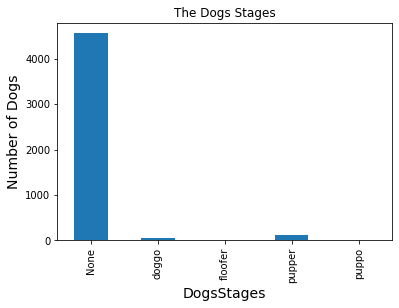

In [70]:
Tweet_final.groupby('dog_stage').tweet_id.size().plot(kind='bar',title='The Dogs Stages');
plt.xlabel('Dogs Stages',fontsize=14);
plt.ylabel('Number of Dogs',fontsize=14);

### Pupper stage is the grater number , and there are 4558 mysteries

In [65]:
Tweet_final['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     4680
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       56
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      20
Name: source, dtype: int64

### Most of the sources are from the iPhone

In [89]:
Tweet_final.groupby('name').tweet_id.size().sort_values(ascending=False)

name
NaN          1144
a             124
Cooper         36
Charlie        32
Oliver         28
             ... 
Mya             4
Naphaniel       4
Neptune         4
Newt            4
Abby            4
Name: tweet_id, Length: 645, dtype: int64

### Regardless of the Null and dummy name, the most frequent name is : Cooper

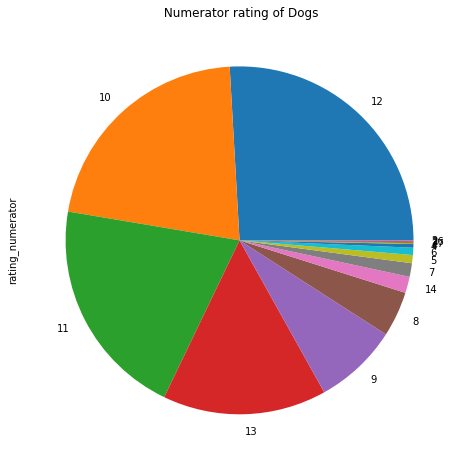

In [90]:
Tweet_final['rating_numerator'].value_counts().plot(kind='pie',figsize=(8,8),title=' Numerator rating of Dogs');

### Here it appears that most of the of rating is great, as the majority were from 10 to 13

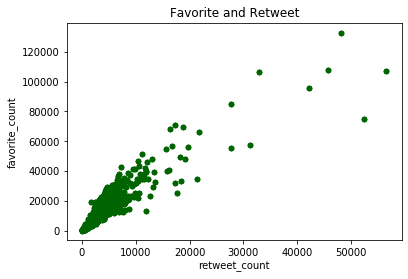

In [75]:
Tweet_final.plot.scatter(x='retweet_count', y='favorite_count', color='DarkGreen',title='Favorite and Retweet');

### That clear there are strong positive relation between retweet_count and favorite_count.

<a id='Resources'></a>
# Resources

* Udacity courses
*  https://datatofish.com/json-string-to-csv-python/
* https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
* https://www.datacamp.com/community/tutorials/joining-dataframes-pandas?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034364&utm_targetid=aud-392016246653:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=21449&gclid=Cj0KCQjwhIP6BRCMARIsALu9LfkJw3lGxq7Gc3mdDCIY1fZ3H3Ea8CE3IgcqIos4ghZv6FRSne9mBX8aAqTmEALw_wcB
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html